In [ ]:
# Library imports
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
# Reading the data from our csv file and writing it into a Pandas dataframe. Then, showing the first five elements of this dataframe
df = pd.read_csv('/content/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Dataframe description
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Making the columns similar as data types and dropping the rows if there are any empty values
df['SeniorCitizen'].replace(to_replace = [0, 1], value = ['No', 'Yes'], inplace = True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

df.dropna(inplace = True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

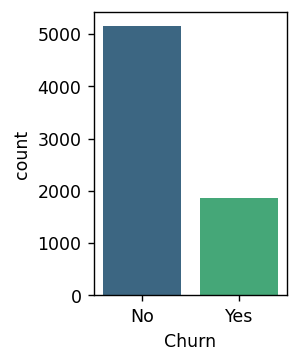

In [ ]:
# Showing the total counts of churn by 'yes' or 'no'. As we can see, the output shows us that, it is an imbalanced dataset.
plt.figure(figsize = (2, 3), dpi = 125)
sns.countplot(data = df, x = 'Churn', palette = 'viridis')

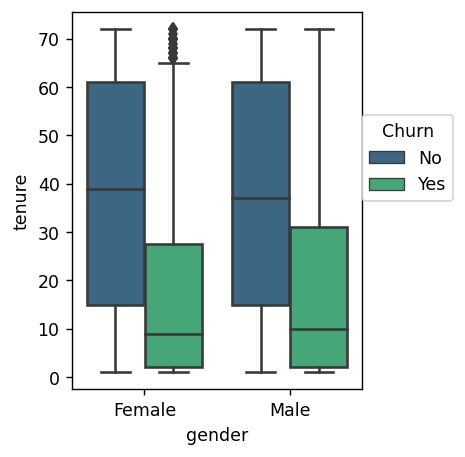

In [ ]:
# Showing the general distribution over tenure by genders as an example
plt.figure(figsize = (3, 4), dpi = 125)
sns.boxplot(data = df, x = 'gender', y = 'tenure', hue = 'Churn', palette = 'viridis')
plt.legend(loc = (1, 0.5), title = "Churn")

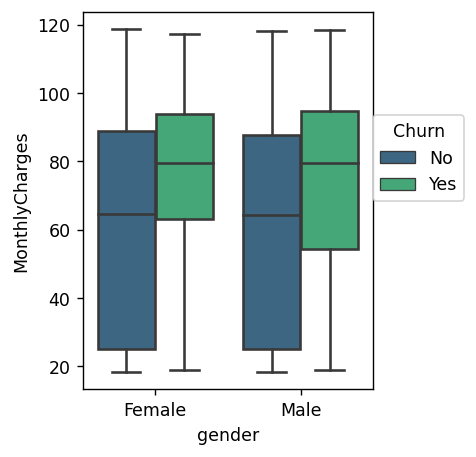

In [ ]:
# Showing the general distribution over monthly charges by genders as an example
plt.figure(figsize = (3, 4), dpi = 125)
sns.boxplot(data = df, x = 'gender', y = 'MonthlyCharges', hue = 'Churn', palette = 'viridis')
plt.legend(loc = (1, 0.5), title = 'Churn')

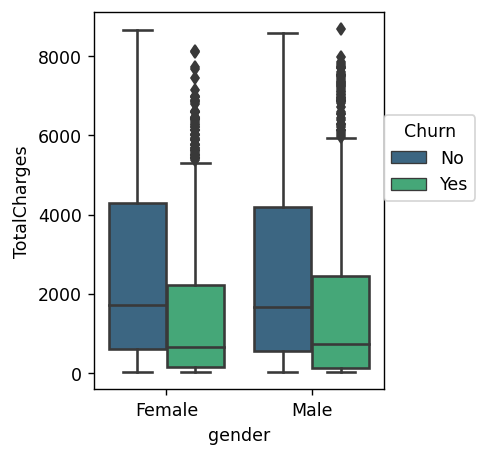

In [ ]:
# Showing the general distribution over total charges by genders as an example
plt.figure(figsize = (3, 4), dpi = 125)
sns.boxplot(data = df, x = 'gender', y = 'TotalCharges', hue = 'Churn', palette = 'viridis')
plt.legend(loc = (1, 0.5), title = 'Churn')

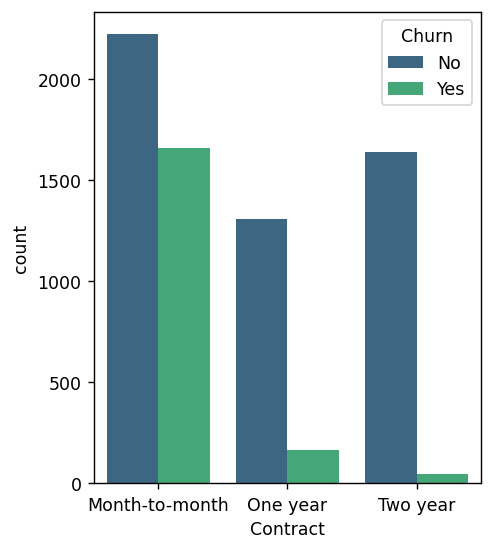

In [ ]:
# Showing the total churn counts over the contract lengths as an example
plt.figure(figsize = (4, 5), dpi = 125)
sns.countplot(data = df, x = 'Contract', hue = 'Churn', palette = 'viridis')

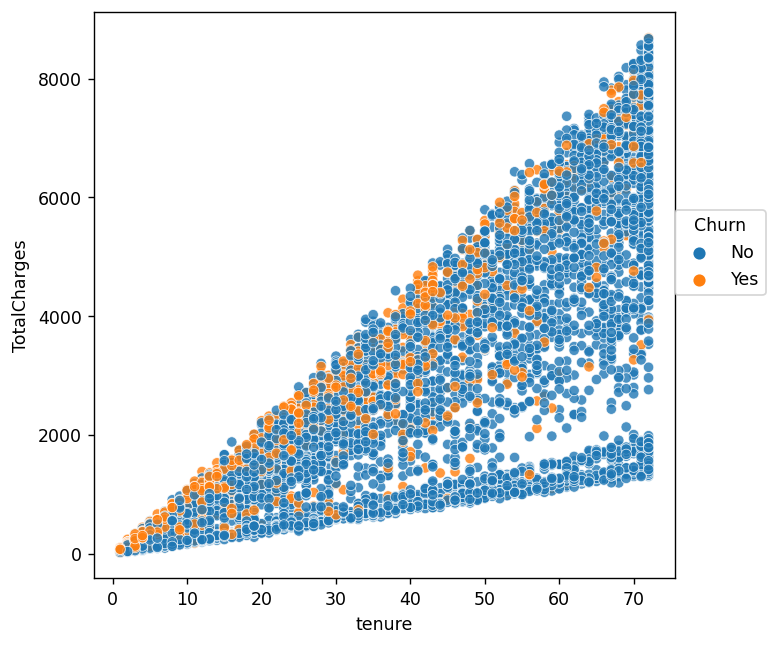

In [ ]:
# Showing the general distribution of churns by tenure and total charges together as an example
plt.figure(figsize = (6, 6), dpi = 125)
sns.scatterplot(data = df, x = 'tenure', y = 'TotalCharges', hue = 'Churn', alpha = 0.8)
plt.legend(loc = (1, 0.5), title = 'Churn')

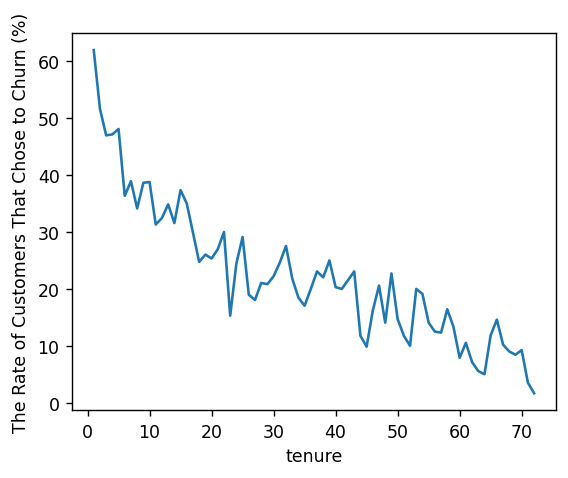

In [ ]:
# Showing the graph of churns rate by the help of tenure as an example
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

churn_rates_yes = 100 * yes_churn / (no_churn + yes_churn)
plt.figure(figsize = (5, 4), dpi = 125)
plt.ylabel('The Rate of Customers That Chose to Churn (%)')
churn_rates_yes.iloc[0].plot()

In [ ]:
# Showing the pairwise correlation of all columns in the dataframe.
df_corr  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                              'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

df_corr.head()

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
gender_Female,1.000000,-1.000000,-0.001819,0.001819,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-1.000000,1.000000,0.001819,-0.001819,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
SeniorCitizen_No,-0.001819,0.001819,1.000000,-1.000000,0.016957,-0.016957,-0.210550,0.210550,0.008392,-0.008392,...,0.046491,0.116205,0.156258,-0.156258,0.016235,0.024359,-0.171322,0.152987,0.150541,-0.150541
SeniorCitizen_Yes,0.001819,-0.001819,-1.000000,1.000000,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
Partner_No,-0.001379,0.001379,0.016957,-0.016957,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982


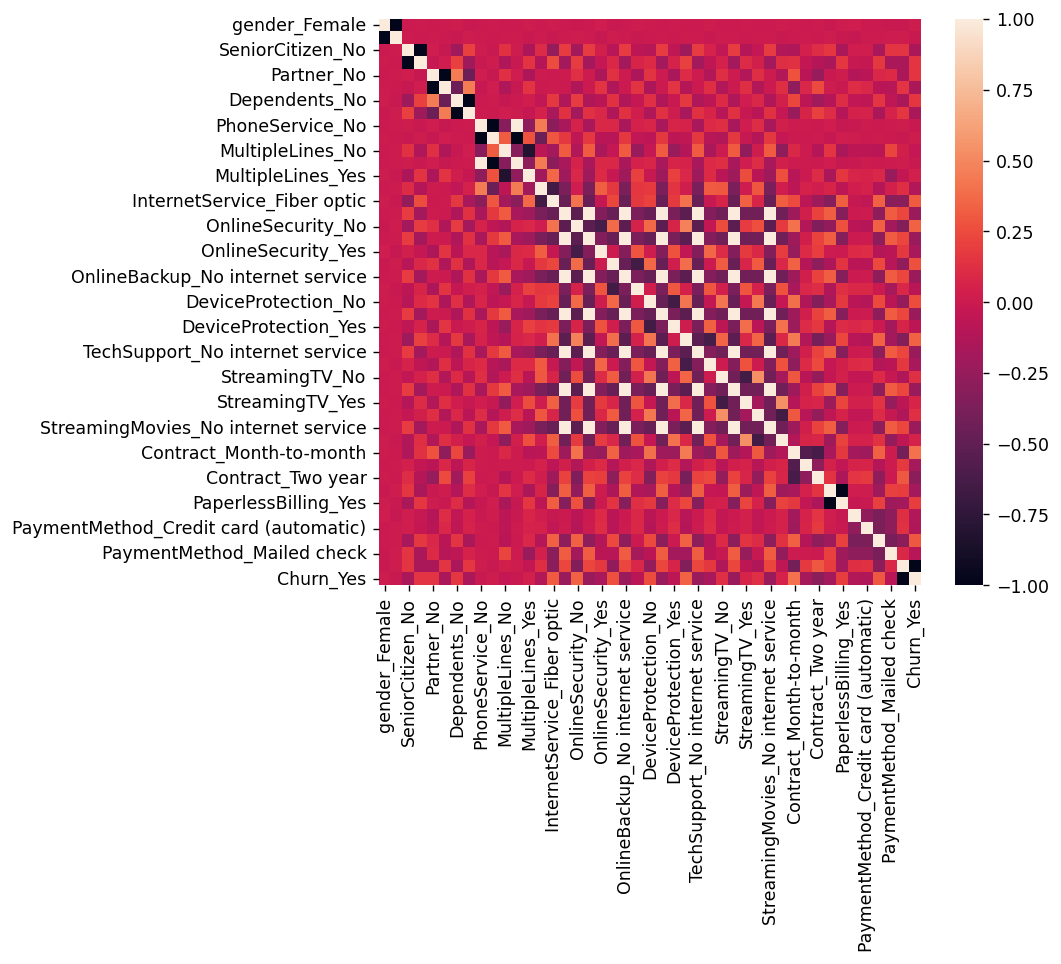

In [ ]:
# Showing the heatmap of column correlations dataframe
plt.figure(figsize = (7, 6), dpi = 125)
sns.heatmap(df_corr)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

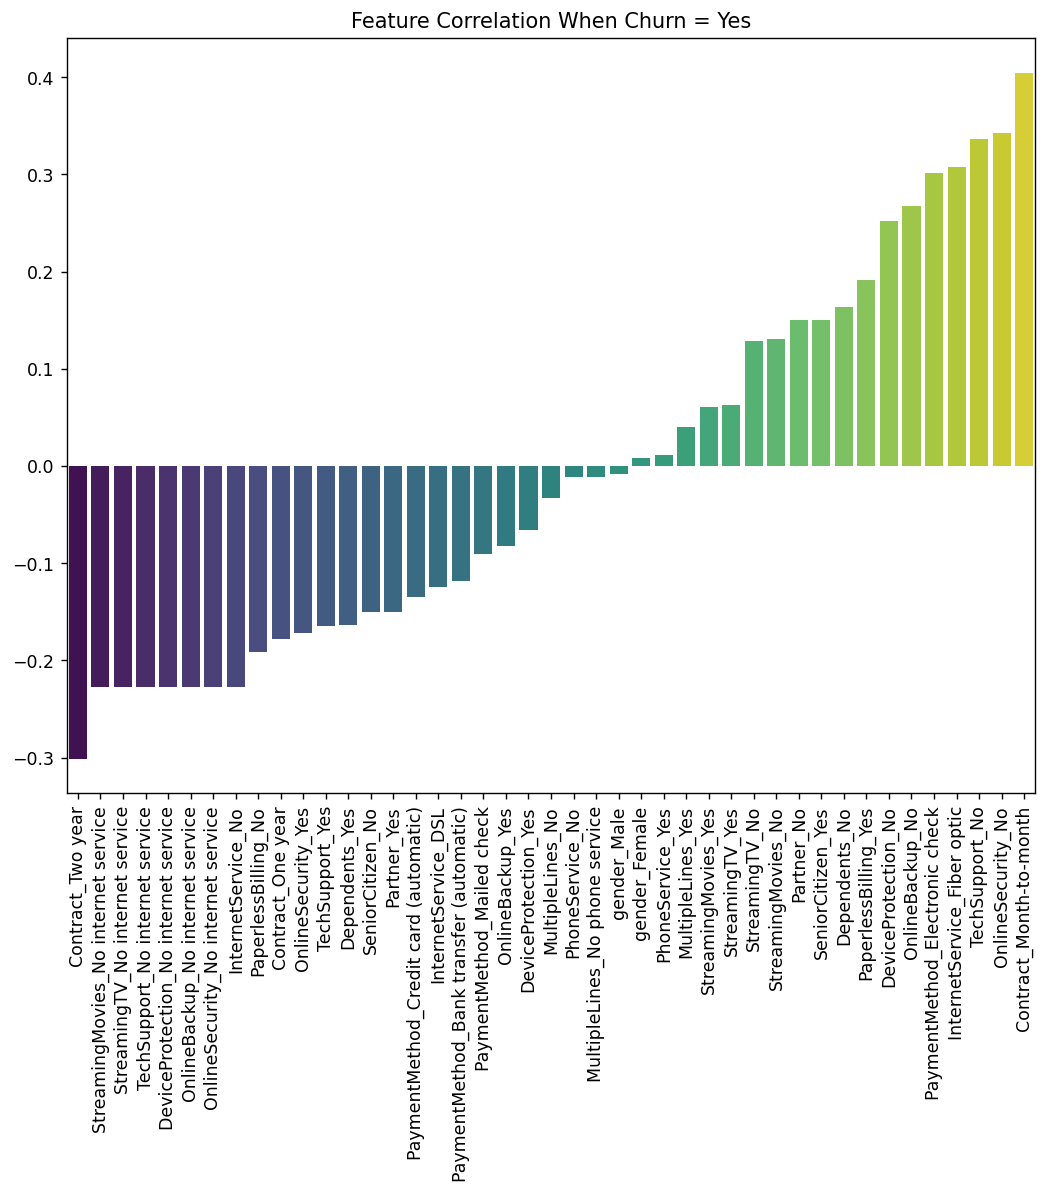

In [ ]:
# Plotting the feature correlations when the churn exists.
plt.figure(figsize = (10, 8), dpi = 125)
sns.barplot(x = df_corr['Churn_Yes'].sort_values().iloc[1:-1].index, y = df_corr['Churn_Yes'].sort_values().iloc[1:-1].values, palette = 'viridis')
plt.title('Feature Correlation When Churn = Yes')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

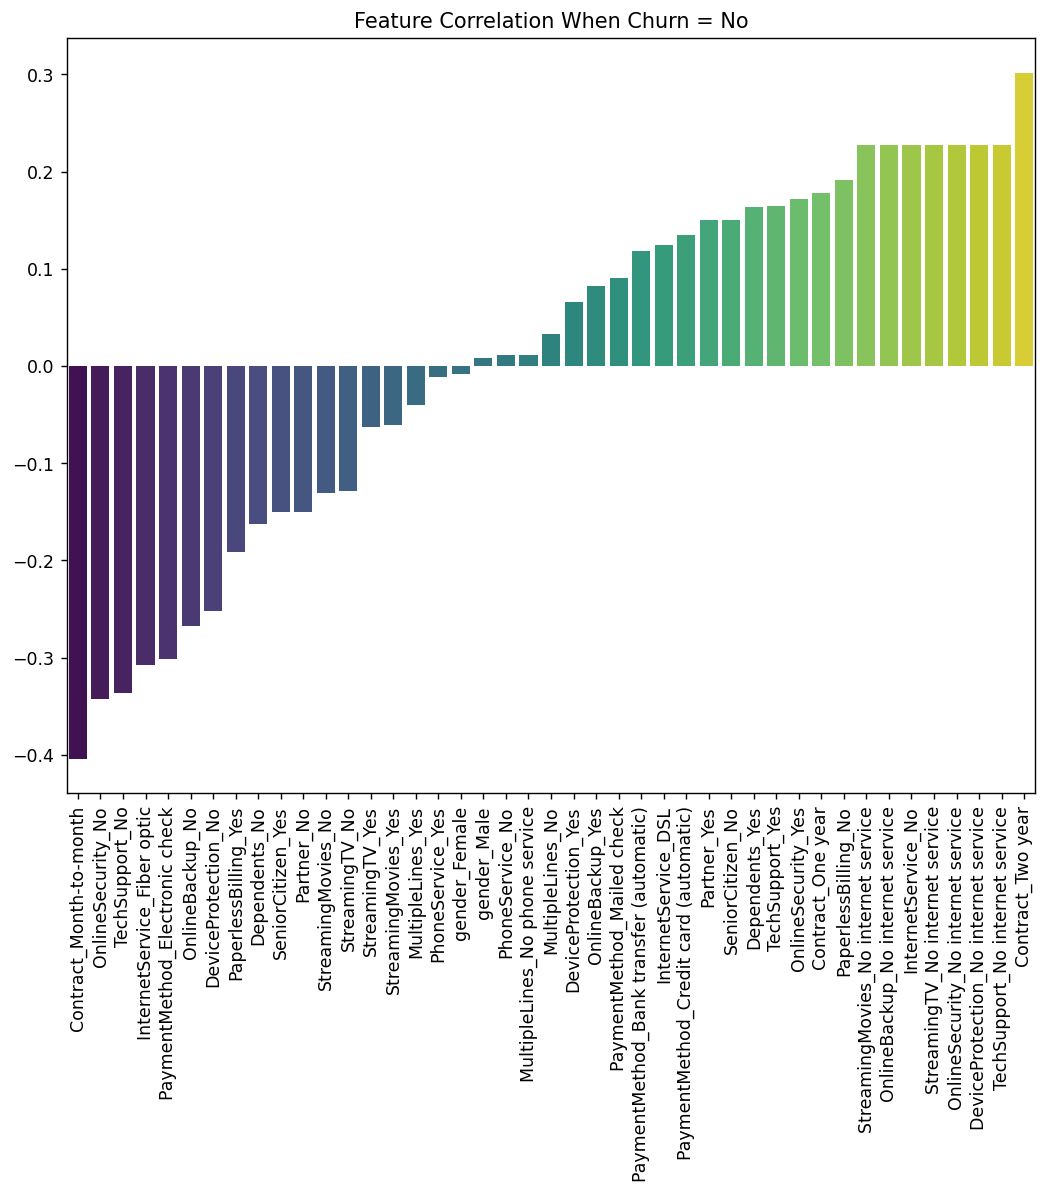

In [ ]:
# Plotting the feature correlations when the churn doesn't exist.
plt.figure(figsize = (10, 8),dpi = 125)
sns.barplot(x = df_corr['Churn_No'].sort_values().iloc[1:-1].index,y = df_corr['Churn_No'].sort_values().iloc[1:-1].values,palette = 'viridis')
plt.title('Feature Correlation When Churn = No')
plt.xticks(rotation = 90)

In [ ]:
# Splitting the input and output columns. We don't need customer IDs in the classification. Also, churns info will be our target output column
X = pd.get_dummies(df.drop(['Churn', 'customerID'], axis = 1), drop_first = True)
y = df['Churn']

In [ ]:
# Splitting the training and testing sets as 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
# Standard scaler fits the input values between 0 and 1. This helps in the training process
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
# Creating a KNN model and training it
model = KNeighborsClassifier()

param_grid= {'n_neighbors': range(1, 50), 'metric': ['minkowski', 'manhattan', 'euclidean']}
grid_model = GridSearchCV(model, param_grid)
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(1, 50)})

In [ ]:
# Making all the predictions on our trained model by our testing data
predictions = grid_model.predict(scaled_X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.84      0.87      0.86      1041
         Yes       0.59      0.54      0.56       366

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407

